In [114]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from scipy.optimize import minimize_scalar
from scipy import special

In [86]:
def jacobi(grid, delta):
    old_grid = np.zeros_like(grid)
    coefficient = 1/4

    k = [0]
    measure = np.max(np.abs(old_grid-grid))
    measures = [measure]
    while  measure > delta:
        old_grid = grid.copy()
        new_grid = grid.copy()
        for i in range(1, len((grid)) - 1):
            for j in range(1, len(grid[i,:]) -1):
                new_grid[i, j] = coefficient * (grid[i+1,j] + grid[i-1,j] + grid[i,j + 1] + grid[i, j -1])
            boundary = coefficient * (grid[i+1,0] + grid[i-1,0] + grid[i,1] + grid[i,-2])
            new_grid[i,0] = boundary
            new_grid[i,-1] = boundary
        grid = new_grid
        measure = np.max(np.abs(old_grid-grid))
        measures.append(measure)
        k.append(k[-1]+1)

    return grid, [k, measures]

In [87]:
def gauss_seidel(grid, delta):
    old_grid = np.zeros_like(grid)
    coefficient = 1/4
    k = [0]
    measure = np.max(np.abs(old_grid-grid))
    measures = [measure]
    while  measure > delta:
        old_grid = grid.copy()
        for i in range(1, len(grid[:,0]) -1):
            boundary = coefficient * (grid[i+1,0] + grid[i-1,0] + grid[i,1] + grid[i,-2])
            grid[i,0] = boundary
            grid[i,-1] = boundary
        for j in range(1, len((grid[0,:])) - 1):
            for i in range(1, len(grid[:,j]) -1):
                grid[i, j] = coefficient * (grid[i+1,j] + grid[i-1,j] + grid[i,j + 1] + grid[i, j -1])
        measure = np.max(np.abs(old_grid-grid))
        measures.append(measure)
        k.append(k[-1]+1)

    return grid, [k, measures]

In [88]:
def sor(grid, omega, delta):
    old_grid = np.zeros_like(grid)
    coefficient = omega/4
    k = [0]
    measure = np.max(np.abs(old_grid-grid))
    measures = [measure]
    while  measure > delta:
        old_grid = grid.copy()
        for i in range(1, len(grid[:,0]) -1):
            boundary = coefficient * (grid[i+1,0] + grid[i-1,0] + grid[i,1] + grid[i,-2]) + (1 - omega) * grid[i,0]
            grid[i,0] = boundary
            grid[i,-1] = boundary
        for j in range(1, len((grid[0,:])) - 1):
            for i in range(1, len(grid[:,j]) -1):
                grid[i, j] = coefficient * (grid[i+1,j] + grid[i-1,j] + grid[i,j + 1] + grid[i, j -1]) + (1 - omega) * grid[i,j]
        measure = np.max(np.abs(old_grid-grid))
        measures.append(measure)
        k.append(k[-1]+1)

    return grid, [k, measures]

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221

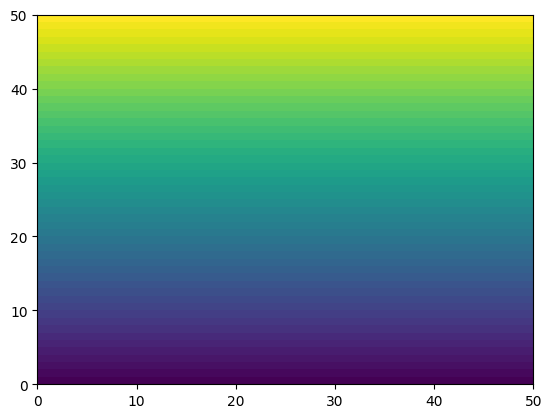

In [89]:
N = 50
initial_grid = np.zeros((N,N))
initial_grid[-1:] += 1
final, k = gauss_seidel(initial_grid, 1e-5)
print(k)
plt.pcolormesh(final)

578


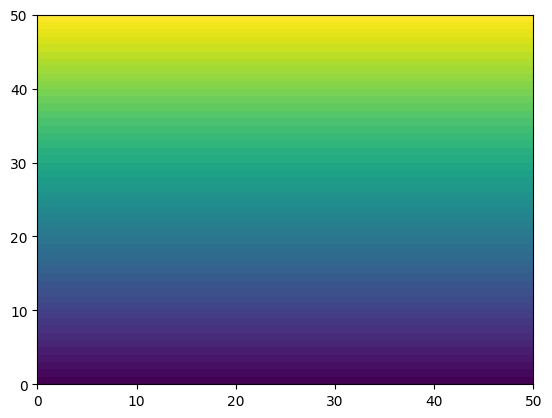

In [80]:
N = 50
initial_grid = np.zeros((N,N))
initial_grid[-1:] += 1
final, k = sor(initial_grid, 1.7, 1e-5)
print(k)
plt.pcolormesh(final)

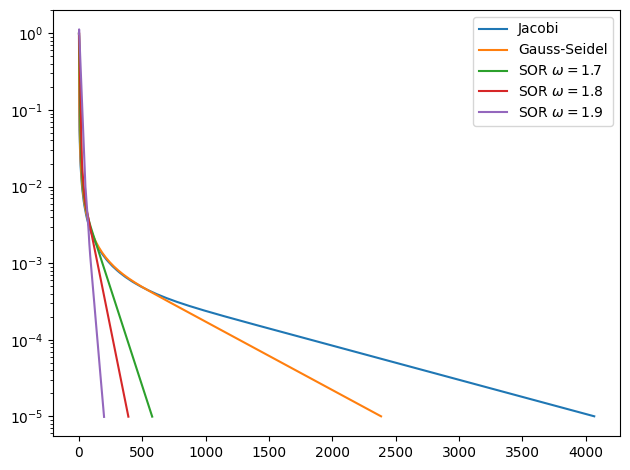

In [98]:
N = 50
initial_grid = np.zeros((N,N))
initial_grid[-1:] += 1
_, k_j = jacobi(initial_grid.copy(), 1e-5)
_, k_g = gauss_seidel(initial_grid.copy(), 1e-5)
_, k_sor_7 = sor(initial_grid.copy(), 1.7, 1e-5)
_, k_sor_8 = sor(initial_grid.copy(), 1.8, 1e-5)
_, k_sor_9 = sor(initial_grid.copy(), 1.9, 1e-5)
# _, k_sor_0 = sor(initial_grid.copy(), 2.0, 1e-5)
plt.plot(k_j[0], k_j[1], label="Jacobi")
plt.plot(k_g[0], k_g[1], label="Gauss-Seidel")
plt.plot(k_sor_7[0], k_sor_7[1], label=r"SOR $\omega = 1.7$")
plt.plot(k_sor_8[0], k_sor_8[1], label=r"SOR $\omega = 1.8$")
plt.plot(k_sor_9[0], k_sor_9[1], label=r"SOR $\omega = 1.9$")
# plt.plot(k_sor_0[0], k_sor_0[1], label=r"SOR $\omega = 2.0$")
plt.yscale("log")
plt.tight_layout()
plt.legend()

In [105]:
N = 50
def optimizable(omega, N):
    initial_grid = np.zeros((N,N))
    initial_grid[-1:] += 1
    _, k = sor(initial_grid.copy(), omega, 1e-5)
    return k[0][-1]
b = minimize_scalar(optimizable, args=(50), bounds=(0, 2))
# optimizable(1.7)

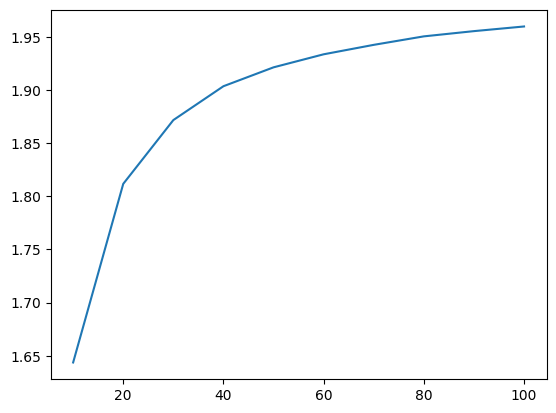

In [108]:
Ns = np.arange(10, 110, 10)
omegas = []
for N in Ns:
    b = minimize_scalar(optimizable, args=(N), bounds=(0, 2))
    omegas.append(b.x)
plt.plot(Ns, omegas)


Text(0.5, 0, 'Grid size N')

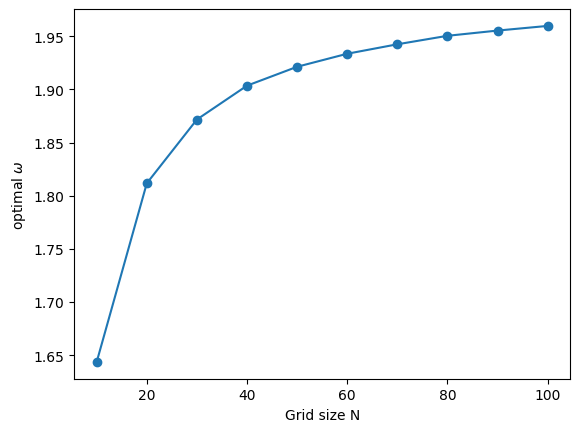

In [110]:
plt.plot(Ns, omegas)
plt.scatter(Ns, omegas)
plt.ylabel(r"optimal $\omega$")
plt.xlabel("Grid size N")

In [115]:
# Error analysis
N = 50
initial_grid = np.zeros((N,N))
initial_grid[-1:] += 1
grid_j, k_j = jacobi(initial_grid.copy(), 1e-5)
grid_g , k_g = gauss_seidel(initial_grid.copy(), 1e-5)
grid_sor , k_sor_7 = sor(initial_grid.copy(), 1.92, 1e-5)
def eval_analytical(t, N):
    x = np.linspace(0,1, N)
    c = 0
    for i in range(10):
        c += special.erfc((1 - x + 2*i)/(2*np.sqrt(t))) -  special.erfc((1 + x + 2*i)/(2*np.sqrt(t))) 
    return c
analytical = eval_analytical(1, N)

In [118]:
j = np.mean(grid_j, axis=1)
g = np.mean(grid_g, axis=1)
sor = np.mean(grid_sor, axis=1)
max_j = np.max(np.abs(analytical-j))
max_g = np.max(np.abs(analytical-g))
max_sor = np.max(np.abs(analytical-sor))
rmse_j = np.sqrt(np.mean((analytical-j)**2))
rmse_g = np.sqrt(np.mean((analytical-g)**2))
rmse_sor = np.sqrt(np.mean((analytical-sor)**2))

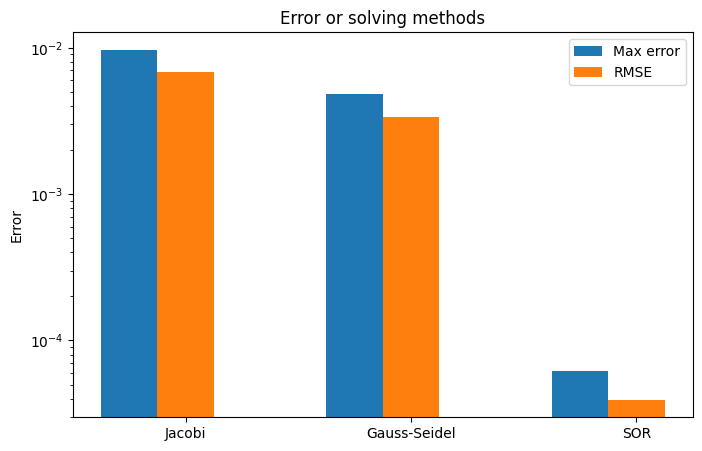

In [122]:
categories = ["Max error", "RMSE"]  # Three categories
x_labels = ["Jacobi", "Gauss-Seidel", "SOR"]  # Groups
values = np.array([
    [max_j, rmse_j],  # Values for Category A
    [max_g, rmse_g],  # Values for Category A
    [max_sor, rmse_sor],  # Values for Category A
]).T

x = np.arange(len(x_labels))  # X positions for groups
width = 0.25  # Width of bars

# Create Figure
fig, ax = plt.subplots(figsize=(8, 5))

# Plot bars
for i in range(len(categories)):
    ax.bar(x + i * width, values[i], width, label=categories[i])

# Labels & Formatting
ax.set_yscale('log')
ax.set_xticks(x + width)
ax.set_xticklabels(x_labels)
ax.set_ylabel('Error')
ax.set_title('Error or solving methods')
ax.legend()

# Show plot
plt.show()
